In [2]:
# 총 버스 정류장 중 score 상위 25% 필터링 후
# 188개 클러스터로 클러스터링

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('../Data/scoring_result_0823_1341.csv')
#print(df.head())
row=len(df)

#score 상위 25% 추출
df_sub=df.sort_values(by='score', ascending=False).head(round(row*0.25))
df_sub.to_csv('../Data/scoring_result_0823_1341_top25p.csv')

pos_sub = df_sub[['위도','경도']]

#상위 25%에서 188개 clustering
k_num= 188
kmeans = KMeans(n_clusters=k_num, random_state=42, n_init=10)
kmeans.fit(pos_sub)
pos_sub['labels']= kmeans.labels_

#클러스터링 한 후 중심점 위치 추출
centers = kmeans.cluster_centers_
dfcenters=pd.DataFrame(centers)

#태블로에서 다른 데이터와 연결 위해 도시명 열 추가
dfcenters['도시명']='천안시' 

#파일로 출력
dfcenters.to_csv('../Data/scoring_result_0823_1341_top25p_cluster188.csv')

### 실루엣 계수

In [4]:
#실루엣 계수 계산
score_samples = silhouette_samples(pos_sub, pos_sub.labels)
pos_sub['silhoutte_coeff'] = score_samples

#실루엣 평균 값 계산 => 0.9923154955304742
average_score = silhouette_score(pos_sub, pos_sub.labels)
#print(average_score)
print(pos_sub.silhoutte_coeff.mean())

0.9922858584065731


### 최적 클러스터 수 구하기 위해 inertia 구하기

In [5]:
kn = range(1,400)
inertias = []

for k in kn:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(pos_sub)
    inertias.append(model.inertia_)

### elbow plot

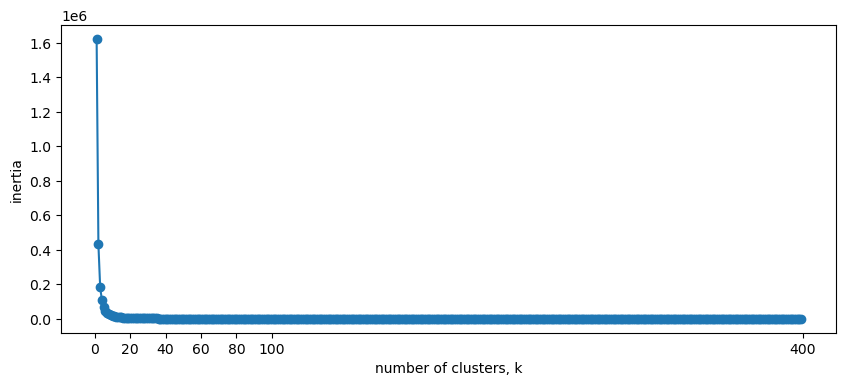

10


In [6]:
from matplotlib import pyplot as plt    
plt.figure(figsize=(10, 4))

plt.plot(kn, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')

plt.xticks([0,20,40,60,80,100,400])
plt.show()

#최적 클러스터 수 확인 -> 10개
from kneed import KneeLocator

kl = KneeLocator(range(1,len(inertias)+1), inertias, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print(optimal_k)